<a href="https://colab.research.google.com/github/nurbekdev/DataSciene-Repeat/blob/main/Rec_sysmtem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recomenedent Systems What is recommendation systems?

### Kutubxonalarni yuklab olamiz

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("/content/Новая таблица - netflix_titles.csv")
df.head

<bound method NDFrame.head of      show_id     type                                      title  \
0         s1    Movie                       Dick Johnson Is Dead   
1         s2  TV Show                              Blood & Water   
2         s3  TV Show                                  Ganglands   
3         s4  TV Show                      Jailbirds New Orleans   
4         s5  TV Show                               Kota Factory   
...      ...      ...                                        ...   
8128   s8129    Movie                           Superman Returns   
8129   s8130  TV Show                   SuperNature: Wild Flyers   
8130   s8131    Movie                                  Superstar   
8131   s8132    Movie                           Surat Dari Praha   
8132   s8133  TV Show  Surviving R. Kelly Part II: The Reckoning   

                   director  \
0           Kirsten Johnson   
1                       NaN   
2           Julien Leclercq   
3                       NaN  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8133 entries, 0 to 8132
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8133 non-null   object
 1   type          8133 non-null   object
 2   title         8133 non-null   object
 3   director      5619 non-null   object
 4   cast          7387 non-null   object
 5   country       7331 non-null   object
 6   date_added    8124 non-null   object
 7   release_year  8133 non-null   int64 
 8   rating        8129 non-null   object
 9   duration      8129 non-null   object
 10  listed_in     8132 non-null   object
 11  description   8132 non-null   object
dtypes: int64(1), object(11)
memory usage: 762.6+ KB


- Bo'sh qiymatlarni tekshiramiz

In [8]:
df.isna().sum()

show_id            0
type               0
title              0
director        2514
cast             746
country          802
date_added         9
release_year       0
rating             4
duration           4
listed_in          1
description        1
dtype: int64

In [9]:
!pip install missingno

Text(0.5, 1.0, 'COLUMN WISE MISSING VALUES')

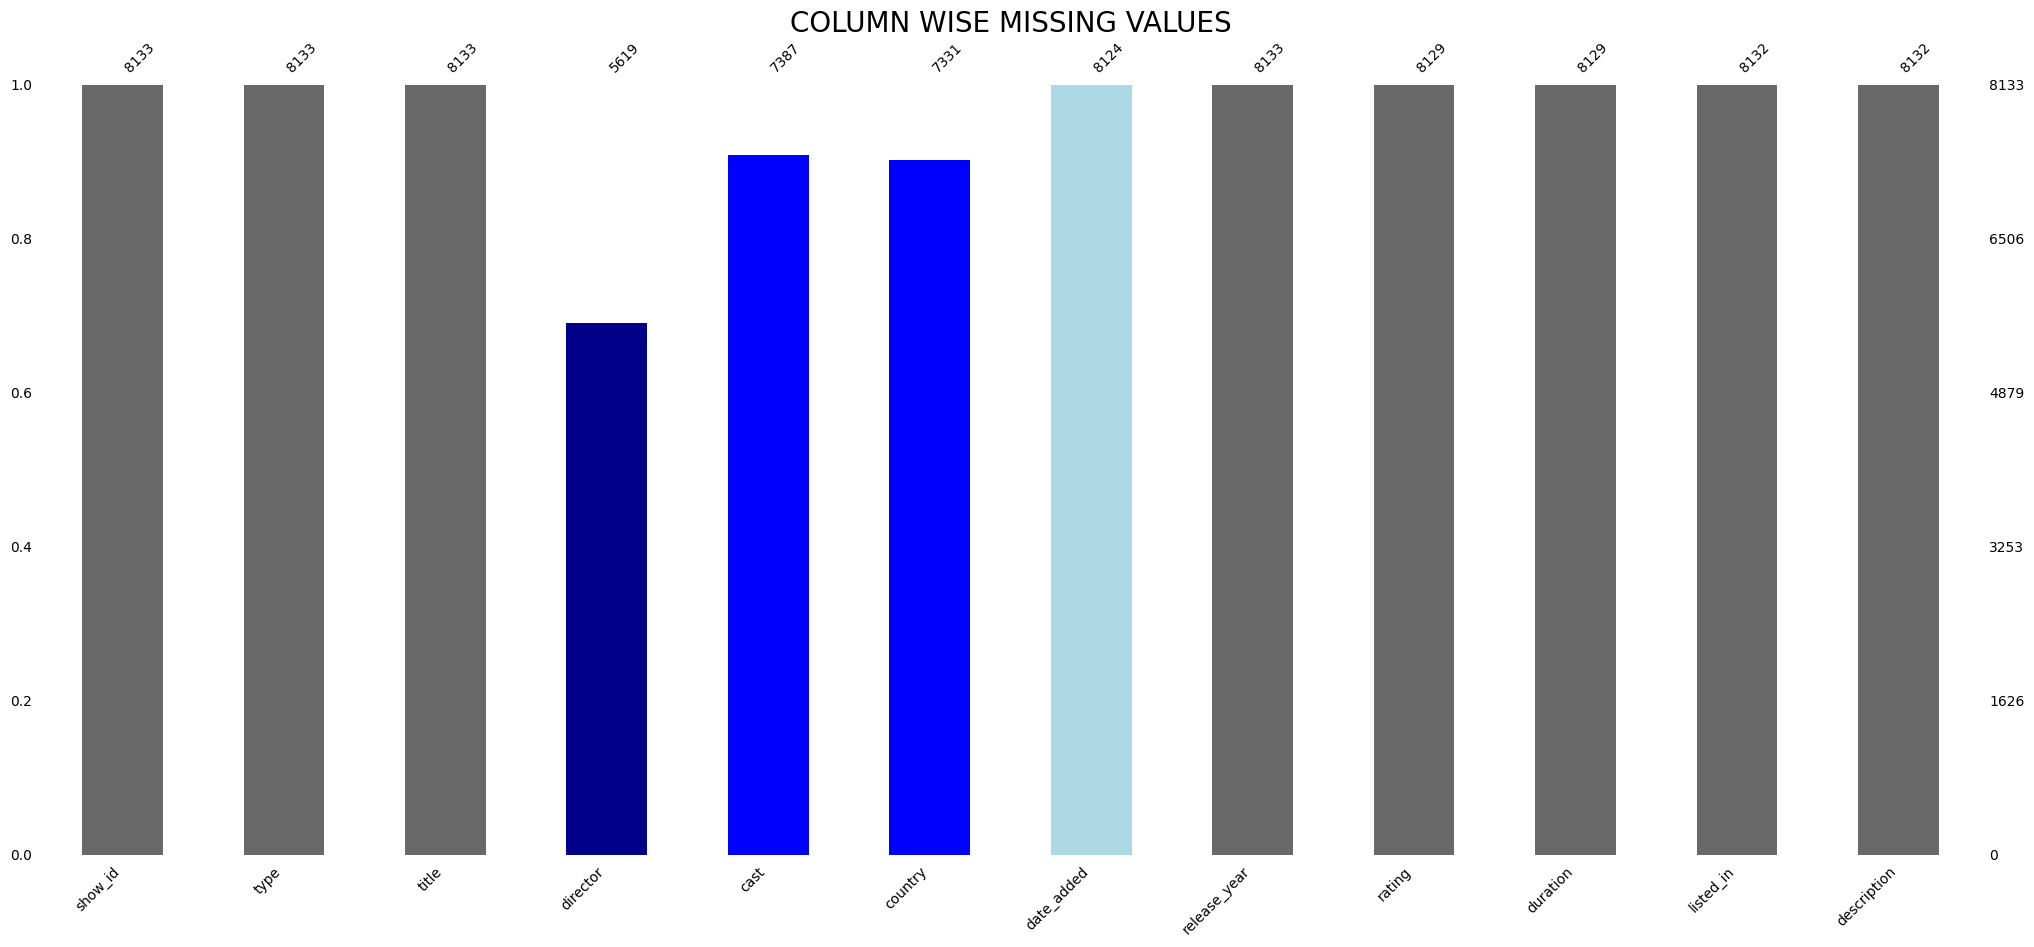

In [12]:
import missingno

#Ustunlarga rang beramiz
color = ['dimgrey', 'dimgrey', 'dimgrey', 'darkblue', 'blue', 'blue', 'lightblue', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey']

missingno.bar(df, fontsize=10, color= color)
plt.title('COLUMN WISE MISSING VALUES', fontsize=20)

###Yetishmayotgan qiymatlar bilan ishlash

In [13]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [14]:
df = df.dropna(how= 'any', subset= ['cast', 'director'])

In [15]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [16]:
df.duplicated().sum()

0

### Ma'lumotlar to'lamini tozalash

In [20]:
df = df.rename(columns = {'listed_in': 'Genre'})
df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])
df['Genre'].head()

2              Crime TV Shows
5                   TV Dramas
6    Children & Family Movies
7                      Dramas
8            British TV Shows
Name: Genre, dtype: object

In [21]:
df['year_add'] = df['date_added'].apply(lambda x: x.split(' ')[-1])
df['year_add'].head()

2    2021
5    2021
6    2021
7    2021
8    2021
Name: year_add, dtype: object

In [22]:
df['month_add'] = df['date_added'].apply(lambda x: x.split(' ')[0])
df['month_add'].head()

2    September
5    September
6    September
7    September
8    September
Name: month_add, dtype: object

In [23]:
df['country_main'] = df['country'].apply(lambda x: x.split(',')[0])
df['country_main'].head()

2     United States
5     United States
6     United States
7     United States
8    United Kingdom
Name: country_main, dtype: object

In [24]:
df['type'].value_counts()

Movie      5034
TV Show     173
Name: type, dtype: int64

In [25]:
df['rating'].value_counts()

TV-MA       1828
TV-14       1249
R            673
TV-PG        421
PG-13        395
PG           242
TV-Y7        116
TV-Y         102
TV-G          92
NR            47
G             32
TV-Y7-FV       3
NC-17          2
UR             2
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

### Ikkita yangi dataframe yaratamiz, bir filmlar to'plami, ikkinchisi TV show uchun

  - movie_df
  - tv_df

In [26]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [27]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,year_add,month_add,country_main
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,September,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,Comedies,A woman adjusting to life after a loss contend...,2021,September,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,Dramas,After most of her family is murdered in a terr...,2021,September,Germany
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,"September 22, 2021",2021,TV-PG,91 min,Children & Family Movies,When the clever but socially-awkward Tetê join...,2021,September,United States


### 3. Explorary Data Analysis

### Exprimental ma'lumotlarni tahlil qilish

Filmlar sonini solishtirish TV SHow

<Axes: xlabel='type', ylabel='count'>

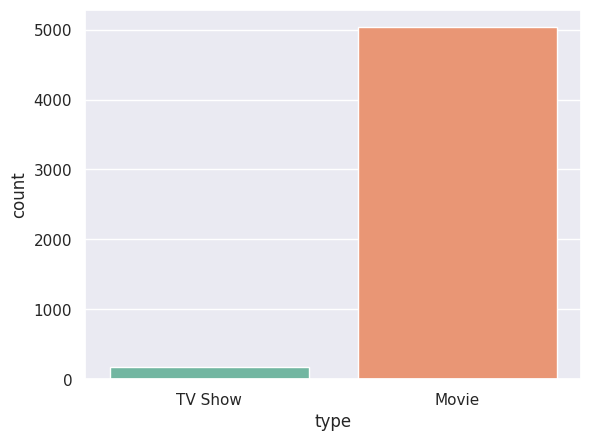

In [29]:
sb.set(style = 'darkgrid')
sb.countplot(x = 'type', data=df, palette = 'Set2')

Movies va TV Shows larning reytingini tahlil qilish

<Axes: xlabel='rating', ylabel='count'>

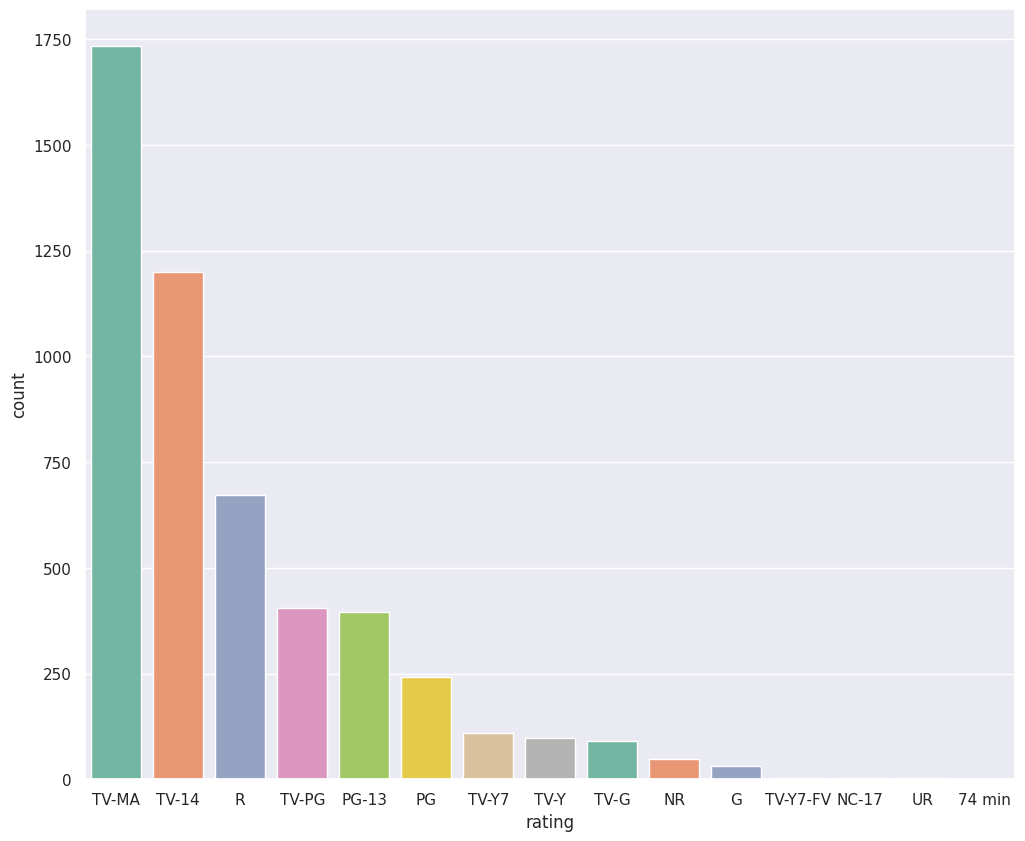

In [32]:
plt.figure(figsize = (12, 10))
sb.set(style = 'darkgrid')
sb.countplot(x = 'rating', data = movie_df, palette = 'Set2', order = movie_df['rating'].value_counts().index[0:15])

TV Show Raytinggi

<Axes: xlabel='rating', ylabel='count'>

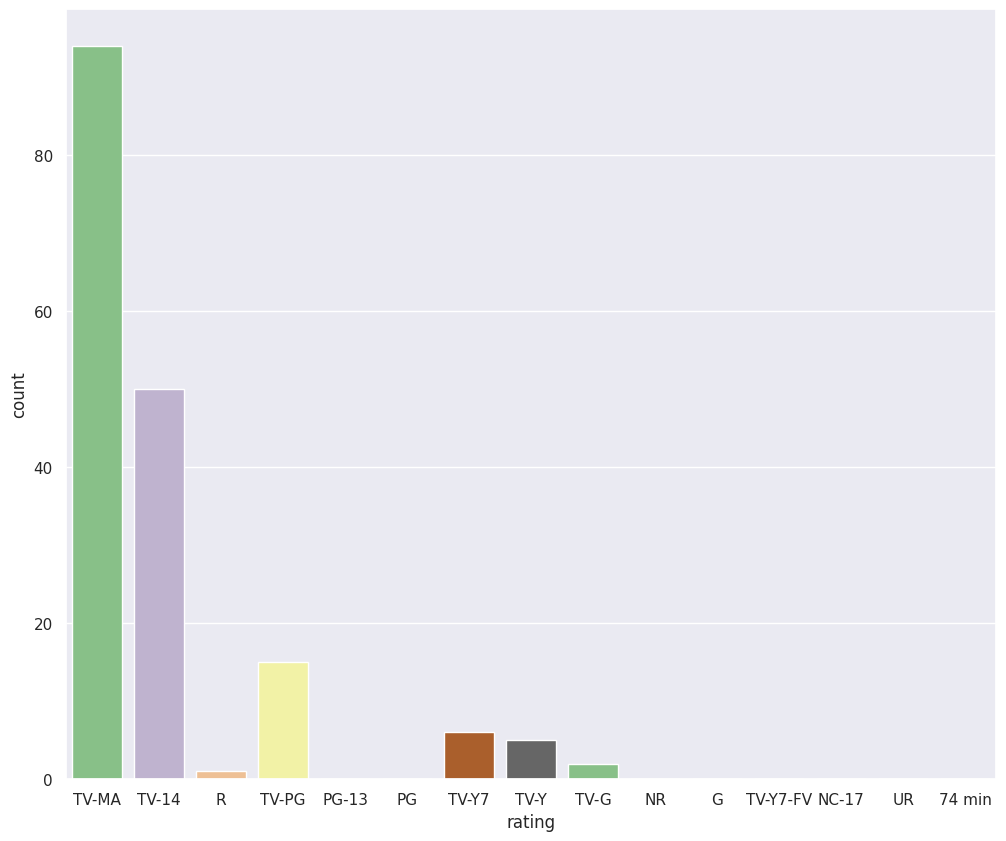

In [33]:
plt.figure(figsize = (12, 10))
sb.set(style = 'darkgrid')
sb.countplot(x = 'rating', data = tv_df, palette = 'Accent', order = movie_df['rating'].value_counts().index[0:15])

Yillik tarkibni tahlil qilish

<Axes: xlabel='count', ylabel='release_year'>

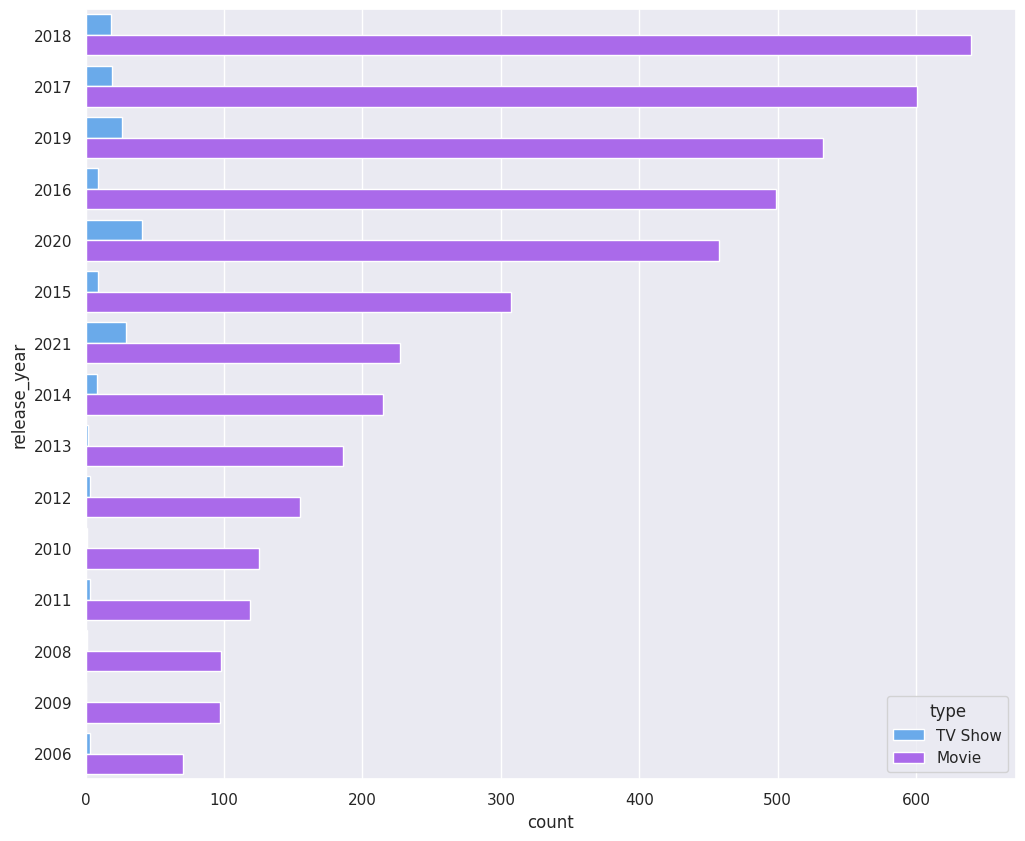

In [35]:
plt.figure(figsize=(12, 10))
sb.set(style = 'darkgrid')
sb.countplot(y = 'release_year', data = df, palette= 'cool', order=df['release_year'].value_counts().index[0:15], hue = df['type'])